In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<span style="color:green;font-weight:bold; font-size:2em">1. Load the dataset<span>


In [2]:
pd_data=pd.read_csv('Data - Parkinsons (2).data')

<span style="color:green;font-weight:bold; font-size:2em">2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points).<span>


In [3]:
pd_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<AxesSubplot:ylabel='Frequency'>

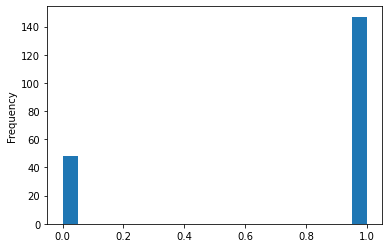

In [4]:
pd_data['status'].plot.hist(bins=20)

In [5]:
(len(pd_data[pd_data['status']==1]))/(len(pd_data))

0.7538461538461538

In [6]:
(len(pd_data[pd_data['status']==0]))/(len(pd_data))

0.24615384615384617

In [7]:
pd_data.shape

(195, 24)

In [8]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
pd_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<span style="color:red;font-weight:bold; font-size:2em">Note:-<span>

## Independent Variables

#####    1. There are 22 independent variables, if we remove 'name' & 'status'.
#####    2. All these 22 independent variables are float64.
#####    3. We need to check the distribution of  Independent Variables for Univariate Analysis
#####    4. We need to check correlation of features for bivariate analysis.

### Challeges :-

It is possible to have high correlation betweeen different featurs and hence we need to find out
features with high correlation and drop the highly correlated independent feature.

Also, it is possible that many of the independent variables are not normally distributed and that can
skew the model output. So, we need to transform the independent variables to normal distribution.

### Approach for Feature Engineering :-

Our approach here will be a **Two Layer** approach.

**First** we will not directly start making changes in the features.
We will **first** directly go for implementing and fitting **models**.
We will find Accuracies and AUC score of models without doing any feature Engineering.

In **second** stage, we will do all the feature Engineering and then we will try to find out the accuracies
and AUC scores after implementing feature Engineering.

And then we will **compare** the accuracies of the models before and after feature engineering to find out whehther
the feature Engineering is needed or not.

## Dependent Variable

As we can see that the data is not balanced. There are almost 25% 0s and 75% 1s.
First we will check the accuracy of the models without making any change in the data imbalance.
We may try to balance the data only if we are not able to find good accuracy with current state of data imbalance.


<span style="color:green;font-weight:bold; font-size:2em">3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)<span>


<span style="color:purple;font-weight:bold; font-size:2em">BiVariate Analysis<span>


In [10]:
correl=pd_data.corr()

<AxesSubplot:>

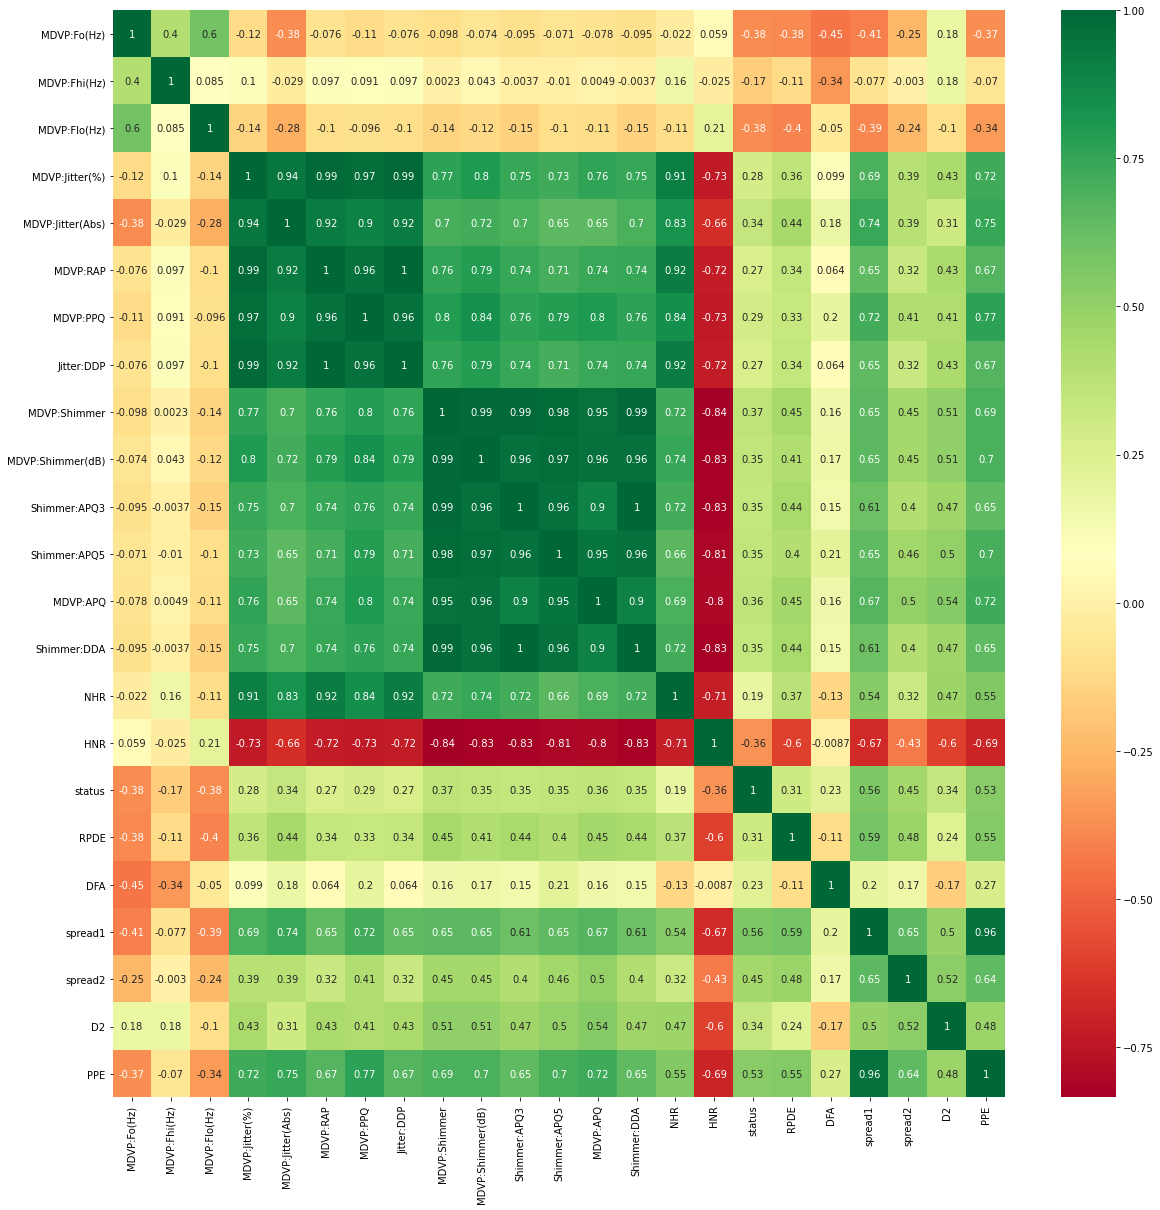

In [11]:
pd.set_option('display.max_columns', None)
plt.figure(figsize=(20,20))

sns.heatmap(correl,annot = True,cmap="RdYlGn")

## Note:-

1. This is a 22 X 22 Matrix of correlations.
2. It is too complicated to observe all the highly correlated features.
3. Let us simplify the above image. We will put the **Threshold>0.7** threshold to find out the features
   which have correlation greater than **0.7**

In [12]:
high_corr=correl[correl>0.7]

<AxesSubplot:>

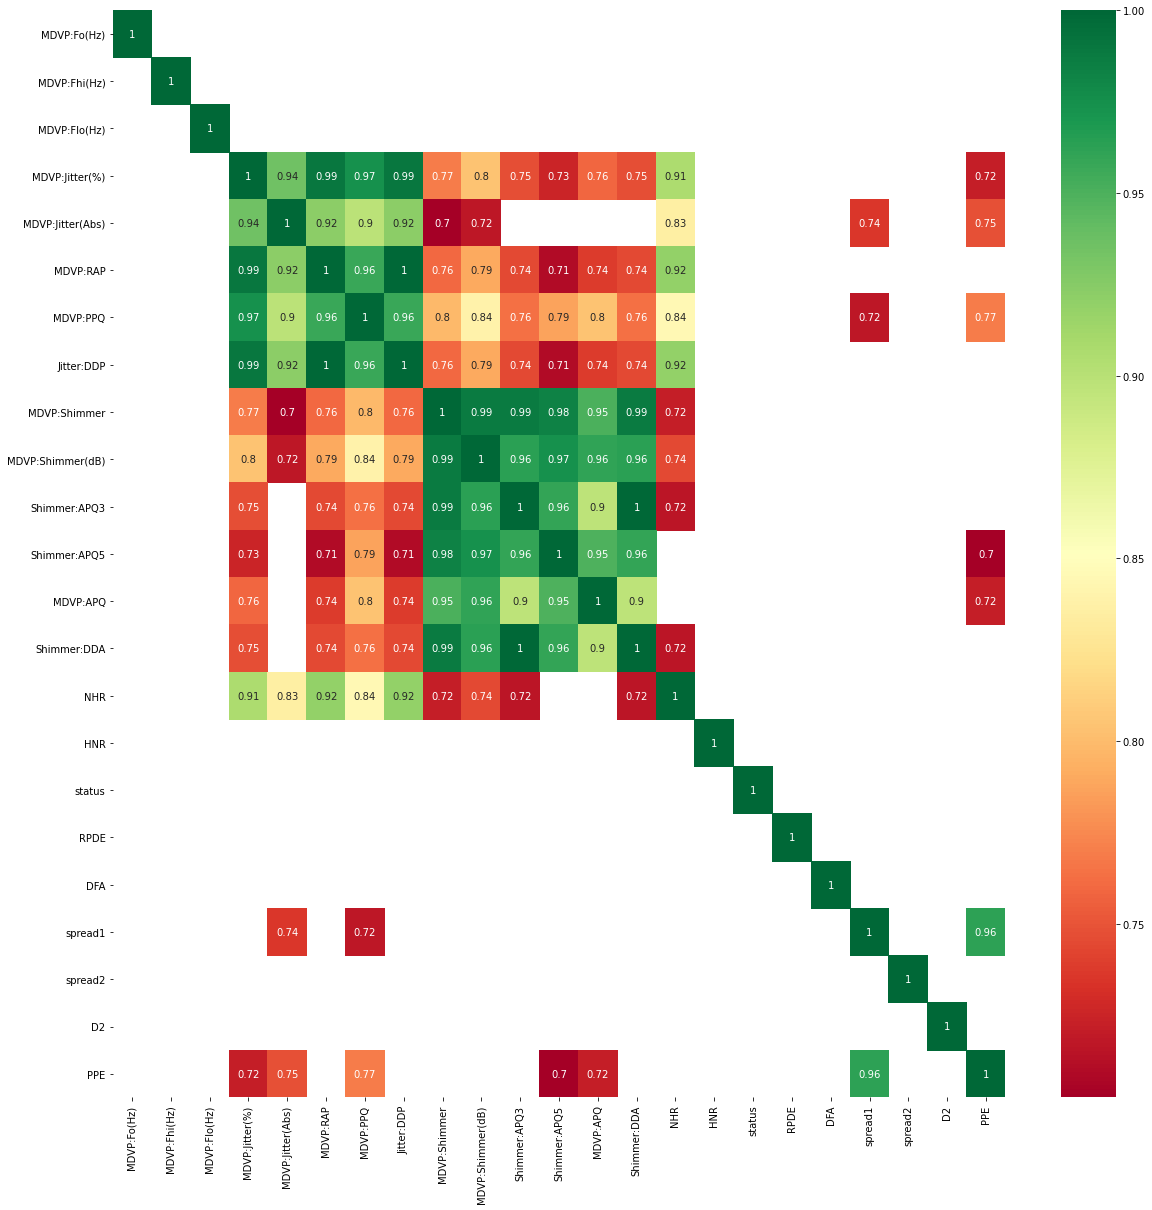

In [13]:
plt.figure(figsize=(20,20))

sns.heatmap(high_corr,annot=True,cmap='RdYlGn')

<span style="color:purple;font-weight:bold; font-size:1.5em">>> Rather than manually counting the highly correlated features let us put that efforts in code.<span>


In [14]:
indices = np.where(correl > 0.8)   # Gives the index of the matrix elements who have corr > 0.8.
indices1 = [(correl.index[x], correl.columns[y]) for x, y in zip(*indices) 
                                        if x != y and x < y]   # Gives the names of pair of features with high corrltn.

In [15]:
indices

(array([ 0,  1,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
        12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 16, 17, 18,
        19, 19, 20, 21, 22, 22], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 14,  3,  4,  5,  6,  7, 14,  3,
         4,  5,  6,  7, 14,  3,  4,  5,  6,  7,  9, 12, 14,  3,  4,  5,  6,
         7, 14,  8,  9, 10, 11, 12, 13,  3,  6,  8,  9, 10, 11, 12, 13,  8,
         9, 10, 11, 12, 13,  8,  9, 10, 11, 12, 13,  6,  8,  9, 10, 11, 12,
        13,  8,  9, 10, 11, 12, 13,  3,  4,  5,  6,  7, 14, 15, 16, 17, 18,
        19, 22, 20, 21, 19, 22], dtype=int64))

In [16]:
indices1

[('MDVP:Jitter(%)', 'MDVP:Jitter(Abs)'),
 ('MDVP:Jitter(%)', 'MDVP:RAP'),
 ('MDVP:Jitter(%)', 'MDVP:PPQ'),
 ('MDVP:Jitter(%)', 'Jitter:DDP'),
 ('MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'),
 ('MDVP:Jitter(%)', 'NHR'),
 ('MDVP:Jitter(Abs)', 'MDVP:RAP'),
 ('MDVP:Jitter(Abs)', 'MDVP:PPQ'),
 ('MDVP:Jitter(Abs)', 'Jitter:DDP'),
 ('MDVP:Jitter(Abs)', 'NHR'),
 ('MDVP:RAP', 'MDVP:PPQ'),
 ('MDVP:RAP', 'Jitter:DDP'),
 ('MDVP:RAP', 'NHR'),
 ('MDVP:PPQ', 'Jitter:DDP'),
 ('MDVP:PPQ', 'MDVP:Shimmer(dB)'),
 ('MDVP:PPQ', 'MDVP:APQ'),
 ('MDVP:PPQ', 'NHR'),
 ('Jitter:DDP', 'NHR'),
 ('MDVP:Shimmer', 'MDVP:Shimmer(dB)'),
 ('MDVP:Shimmer', 'Shimmer:APQ3'),
 ('MDVP:Shimmer', 'Shimmer:APQ5'),
 ('MDVP:Shimmer', 'MDVP:APQ'),
 ('MDVP:Shimmer', 'Shimmer:DDA'),
 ('MDVP:Shimmer(dB)', 'Shimmer:APQ3'),
 ('MDVP:Shimmer(dB)', 'Shimmer:APQ5'),
 ('MDVP:Shimmer(dB)', 'MDVP:APQ'),
 ('MDVP:Shimmer(dB)', 'Shimmer:DDA'),
 ('Shimmer:APQ3', 'Shimmer:APQ5'),
 ('Shimmer:APQ3', 'MDVP:APQ'),
 ('Shimmer:APQ3', 'Shimmer:DDA'),
 ('Shimmer:A

In [17]:
columnList=[]
for k in range(len(indices1)):
    columnList.append(indices1[k][0])

In [18]:
column_list=np.unique(columnList)
column_list    # This is a list of unique highly correlated features. This list we will later use to drop the columns with high correlation.

array(['Jitter:DDP', 'MDVP:APQ', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)',
       'MDVP:PPQ', 'MDVP:RAP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'spread1'], dtype='<U16')

<span style="color:purple;font-weight:bold; font-size:1.5em">1.  Above is the list of unique columuns which have corr of greater than 0.8 with thier paired columns<span>
    
    
<span style="color:purple;font-weight:bold; font-size:1.5em">2. Let us find out the correlated features for a list of Threshold Values<span>



In [19]:
corr_thresh=[0.6,0.7,0.8,0.9]

In [20]:
length_drop_columns=[]
for threshold in corr_thresh:
     thresh_columnList=[]
     thresh_indices = np.where(correl > threshold)
     thresh_indices1 = [(correl.index[x], correl.columns[y]) for x, y in zip(*thresh_indices) if x != y and x < y]
     for k in range(len(thresh_indices1)):
             thresh_columnList.append(thresh_indices1[k][0])
     unique_features=np.unique(thresh_columnList)
     length_un_features=len(unique_features)
     length_drop_columns.append(length_un_features)

In [21]:
length_drop_columns

[13, 12, 11, 10]

In [22]:
feature_names=list(zip(corr_thresh,length_drop_columns))
df=pd.DataFrame(feature_names,columns=['Correl_Thresh','No. of Columns with high corr'])
df

,Correl_Thresh,No. of Columns with high corr
0,0.6,13
1,0.7,12
2,0.8,11
3,0.9,10


<span style="color:blue;font-weight:bold; font-size:1.5em">As we can see from above table and as should be obvious, as we increase the Threshold the number of high correlated columns decrease.<span>
    
<span style="color:blue;font-weight:bold; font-size:1.5em">Later, at the end part of the project we will consider this in our feature engineering. We will drop columns which have a correlation of more than 0.8<span>

<span style="color:purple;font-weight:bold; font-size:2em">UniVariate Analysis<span>


<span style="color:red;font-weight:bold; font-size:1.25em">Let us draw a "DistPlot" & its corresponding "ProbPlot" to check the distribution of individual Features<span>

    
<span style="color:red;font-weight:bold; font-size:1.25em">We will comment after we have gone through all the graphs.<span>


In [23]:
import scipy.stats as stat
import pylab 

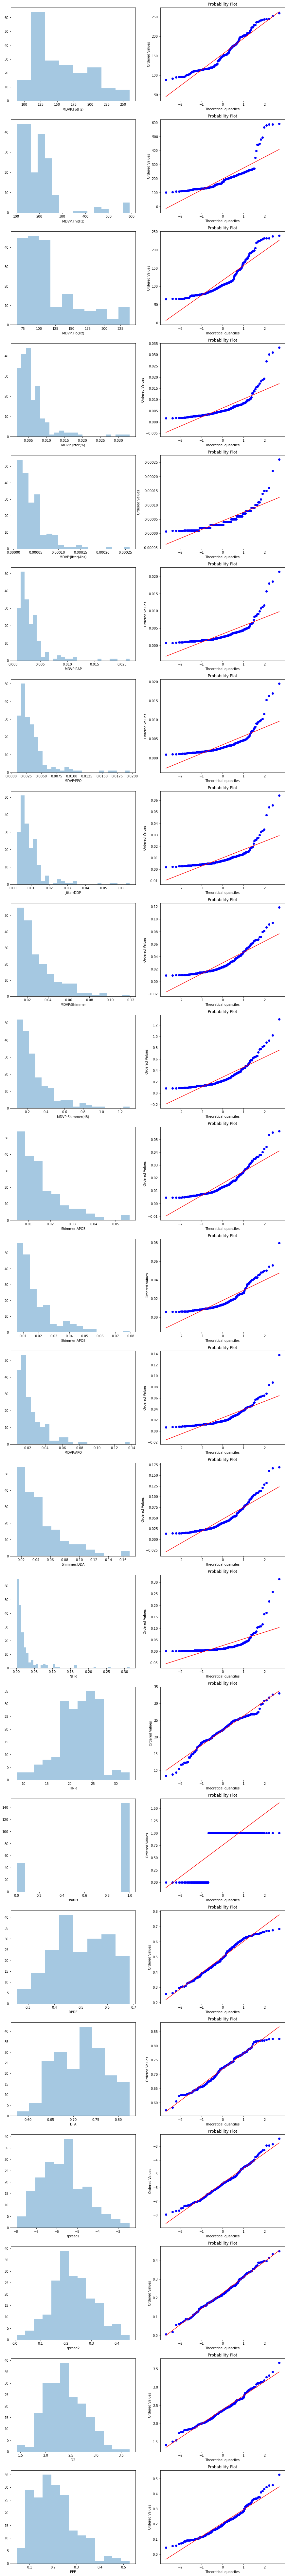

In [24]:
fig=plt.figure(figsize=(15,150))
Column_list=list(pd_data.columns)
Column_list.remove('name')

i=1
for x in Column_list:
     plt.subplot(24,2,i)    
     sns.distplot(pd_data[x],kde=False)
     i = i+1
     ax=plt.subplot(24,2,i)  
     stat.probplot(pd_data[x],dist='norm',plot=pylab)
     i +=1

In [25]:
pd_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<span style="color:red;font-weight:bold; font-size:1.25em">As can be seen from the above graphs the first 14 Columns are not normally distributed.<span>
    
<span style="color:red;font-weight:bold; font-size:1.25em">Columns Starting from "MDVP:Fhi(Hz)" to "NHR" are not normally distributed. They have high skewness.<span>
    

<span style="color:red;font-weight:bold; font-size:1.25em">Interestingly, all 14 columns are "Rightly Skewed".<span>
    
 <span style="color:red;font-weight:bold; font-size:1.25em">We are not going to log normalize these features immediately. As per our approach discussed above, we will first calculate the accuracies of Models as it is. In the later part of the project we will log normalize the features and then re-calculate the Accuracies of Models.<span>

<span style="color:green;font-weight:bold; font-size:2em">5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)<span>


In [26]:
pd_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [27]:
X=pd_data.drop(['name','status'],axis=1)
y=pd_data['status']

In [28]:
from sklearn.preprocessing import StandardScaler

X_columns=X.columns

scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_columns)

<span style="color:green;font-weight:bold; font-size:2em">4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)<span>


In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

<span style="color:green;font-weight:bold; font-size:2em">6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)<span>


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [31]:
svm=SVC()
RF=RandomForestClassifier()
dtree=DecisionTreeClassifier()
bagcl=BaggingClassifier()
adboost=AdaBoostClassifier()
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier()
xgb=XGBClassifier()

In [32]:
LR.fit(x_train,y_train)
print(LR.score(x_test,y_test))
LR_predict=LR.predict(x_test)

0.7796610169491526


In [33]:
NB.fit(x_train,y_train)
print(NB.score(x_test,y_test))
NB_predict=NB.predict(x_test)

0.6440677966101694


In [34]:
KNN.fit(x_train,y_train)
print(KNN.score(x_test,y_test))
KNN_predict=KNN.predict(x_test)

0.8983050847457628


In [35]:
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test))
svm_predict=svm.predict(x_test)

0.8813559322033898


In [36]:
dtree.fit(x_train,y_train)
print(dtree.score(x_test,y_test))
dtree_predict=dtree.predict(x_test)

0.7966101694915254


<span style="color:green;font-weight:bold; font-size:2em">8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)<span>


In [37]:
adboost.fit(x_train,y_train)
print(adboost.score(x_test,y_test))
adboost_predict=adboost.predict(x_test)

0.8813559322033898


In [38]:
RF.fit(x_train,y_train)
print(RF.score(x_test,y_test))
RF_predict=RF.predict(x_test)

0.8135593220338984


In [39]:
bagcl.fit(x_train,y_train)
print(bagcl.score(x_test,y_test))
bagcl_predict=bagcl.predict(x_test)

0.7457627118644068


In [40]:
xgb.fit(x_train,y_train)
print(xgb.score(x_test,y_test))
xgb_predict=xgb.predict(x_test)

0.7796610169491526


 <span style="color:purple;font-weight:bold; font-size:2.5em">Fine Tuning the Models using Hyperparameters<span>


# Grid Search For selective Models

 <span style="color:blue;font-weight:bold; font-size:2em">GridSearch for SVM<span>
 

In [41]:
param={
      "C"  :  [0.10,0.25,0.3,0.5,0.9,1,1.5,2,3,5,7,9],
  "gamma"  :  [0.01,0.1,0.1,0.15,0.20,0.25,0.30,0.5,0.75,1,2],
 "kernel"  :  ['linear', 'poly', 'rbf', 'sigmoid']
}

In [42]:
from sklearn.model_selection import GridSearchCV
SVM_GridSearch = GridSearchCV(estimator=SVC(),param_grid=param,cv=10,n_jobs =-1,verbose = 3)
SVM_GridSearch.fit(X,y)

Fitting 10 folds for each of 528 candidates, totalling 5280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 1760 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 2912 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 4320 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 5265 out of 5280 | elapsed:   45.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5280 out of 5280 | elapsed:   45.0s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.25, 0.3, 0.5, 0.9, 1, 1.5, 2, 3, 5, 7, 9],
                         'gamma': [0.01, 0.1, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5,
                                   0.75, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [43]:
SVM_GridSearch.best_estimator_

SVC(C=3, gamma=0.2)

In [44]:
SVM_CF=SVM_GridSearch.best_estimator_
SVM_CF.fit(x_train,y_train)
print(SVM_CF.score(x_test,y_test))

0.9491525423728814


 <span style="color:blue;font-weight:bold; font-size:2em">GridSearch for KNN<span>
 
 

In [45]:
params={
    "n_neighbors"  :  [1,3,5,7,9,11,15,19,25,29,35,39],
    "weights"      :  ['uniform', 'distance'],
    "algorithm"    :  ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "p"            :  [1,2]
}

In [46]:
from sklearn.model_selection import GridSearchCV

KNN_GridSearch = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=10,n_jobs =-1,verbose = 3)
KNN_GridSearch.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    8.8s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 19, 25, 29, 35,
                                         39],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=3)

In [47]:
KNN_GridSearch.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

In [48]:
KNN_GSearch=KNN_GridSearch.best_estimator_
KNN_GSearch.fit(x_train,y_train)
print(KNN_GSearch.score(x_test,y_test))

0.9152542372881356


In [49]:
KNN_GSearch=KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
KNN_GSearch.fit(x_train,y_train)
print(KNN_GSearch.score(x_test,y_test))

0.9491525423728814


 <span style="color:blue;font-weight:bold; font-size:2em">GridSearch for Adaboost<span>
 
 


In [50]:
adboost=AdaBoostClassifier()

In [51]:
adboost_param={
    'n_estimators'  :  [10,50,100,150,200,250,300],
    'learning_rate' :  [0.1,0.3,0.5,0.8,1,1.5,2,2.5,3]
    
}

In [52]:
adboost_GridSearch = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=adboost_param,cv=10,n_jobs =-1,verbose = 3)
adboost_GridSearch.fit(X,y)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8, 1, 1.5, 2, 2.5,
                                           3],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 300]},
             verbose=3)

In [53]:
adboost_GridSearch.best_estimator_

AdaBoostClassifier(learning_rate=0.8, n_estimators=250)

In [54]:
adboost=adboost_GridSearch.best_estimator_
adboost.fit(x_train,y_train)
print(adboost.score(x_test,y_test))

0.8813559322033898


<span style="color:red;font-weight:bold; font-size:1.25em">Let us compare the accuracies of the models before and after the GridSearch to find the importance of Hyperparameter Tuning<span>

    1. KNN -     Accuracy from 0.8664 >>> 0.949
    2. SVM -     Accuracy from 0.8474 >>> 0.949
    3. Adboost - Accuracy from 0.881  >>> 0.881
   

 <span style="color:purple;font-weight:bold; font-size:2em">Preparing the models for comparison and noting down the Accuracies & Other Parameters<span>
 
 


In [55]:
# Let us put Confusion Matrix of all the models together for comparison of models.
# Initialising lists with models and model names.
from sklearn import metrics

models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'),XGBClassifier(),SVC(C=3, gamma=0.25,probability=True),
            RandomForestClassifier(),DecisionTreeClassifier(),BaggingClassifier(),AdaBoostClassifier(learning_rate=0.8, n_estimators=250)]
model_names=['LR','NB','KNN','xgb','SVC','RF','DTREE','BAG_CF','AdaBoost']

CM=[]             # Set the confusion matrix to empty list for appending all confusion matrices

Recall=[]        # Setting the parameters to empty list for appending the values for all models.
Specificity=[]
Accuracy=[]
Precision=[]
Neg_Pred_value=[]
F1_Score=[]

TPs=[]
FPs=[]
TNs=[]
FNs=[]
AUC=[]


In [56]:
# Applying FOR-LOOP for calculating confusion matrix & Calculating matrix parameters.

for x,model in zip(model_names, models):
    
    model.fit(x_train,y_train)
    
    y_predict  = model.predict(x_test)
    yprob      =model.predict_proba(x_test)

    
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
    cm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in [x+"_Predict 1",x+"_Predict 0"]])
    CM.append(cm)
           
    TP = cm.iloc[0,0]
    FP= cm.iloc[1,0]
    TN = cm.iloc[1,1]
    FN= cm.iloc[0,1]
    auc_score=metrics.roc_auc_score(y_test, yprob[:,1])
    
    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)
    AUC.append(auc_score)
    
    Recall.append(TP/(TP+FN))
    Specificity.append(TN/(TN+FP))
    Accuracy.append((TP+TN)/(TP+TN+FP+FN))
    Precision.append(TP/(TP+FP))
    Neg_Pred_value.append(TN/(TN+FN))
    

In [57]:
# Calculation F1 Score using list of Precison & Recall.
for i,j in zip(Precision, Recall):
    f1_score=2*((i*j)/(i+j))
    F1_Score.append(f1_score)
    
CM_Main=pd.concat(CM,axis=1)  # Printing the CM of all models.
CM_Main



,LR_Predict 1,LR_Predict 0,NB_Predict 1,NB_Predict 0,KNN_Predict 1,KNN_Predict 0,xgb_Predict 1,xgb_Predict 0,SVC_Predict 1,SVC_Predict 0,RF_Predict 1,RF_Predict 0,DTREE_Predict 1,DTREE_Predict 0,BAG_CF_Predict 1,BAG_CF_Predict 0,AdaBoost_Predict 1,AdaBoost_Predict 0
1,40,7,26,21,44,3,40,7,44,3,41,6,35,12,38,9,42,5
0,6,6,0,12,0,12,6,6,0,12,7,5,3,9,6,6,2,10


In [58]:
# Zipping lists of all the parameters to form the DataFrame for better comparions of all models.
data_tuples = list(zip(TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score))
df1=pd.DataFrame(data_tuples,index=['Logistic Regression','Naive Bayes','KNN','XGBClassifier','SVM MODEL','Random Forest','Decision Tree','Bagging_Classifier','AdaBoost Classifier'],
               columns=['TPs','FNs','TNs','FPs','Recall','Specificity','Accuracy','AUC','Precision','Neg_Pred_value','F1_Score'])
df1

,TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score
Logistic Regression,40,7,6,6,0.851064,0.500000,0.779661,0.767730,0.869565,0.461538,0.860215
Naive Bayes,26,21,12,0,0.553191,1.000000,0.644068,0.836879,1.000000,0.363636,0.712329
KNN,44,3,12,0,0.936170,1.000000,0.949153,0.982270,1.000000,0.800000,0.967033
XGBClassifier,40,7,6,6,0.851064,0.500000,0.779661,0.909574,0.869565,0.461538,0.860215
SVM MODEL,44,3,12,0,0.936170,1.000000,0.949153,0.980496,1.000000,0.800000,0.967033
Random Forest,41,6,5,7,0.872340,0.416667,0.779661,0.889184,0.854167,0.454545,0.863158
Decision Tree,35,12,9,3,0.744681,0.750000,0.745763,0.747340,0.921053,0.428571,0.823529
Bagging_Classifier,38,9,6,6,0.808511,0.500000,0.745763,0.795213,0.863636,0.400000,0.835165
AdaBoost Classifier,42,5,10,2,0.893617,0.833333,0.881356,0.920213,0.954545,0.666667,0.923077


In [59]:
comparison=df1['Accuracy']   # Copying the Accuracy part to the "Comparison" DataFrame for later comparison.
comparison=pd.DataFrame(comparison)
comparison.rename(columns={'Accuracy' : 'Accuracy_w/o_conditn'},inplace=True)

 <span style="color:purple;font-weight:bold; font-size:2em">Preparing for ROC and Calculating AUC Score for each model<span>
 
 


# ROC

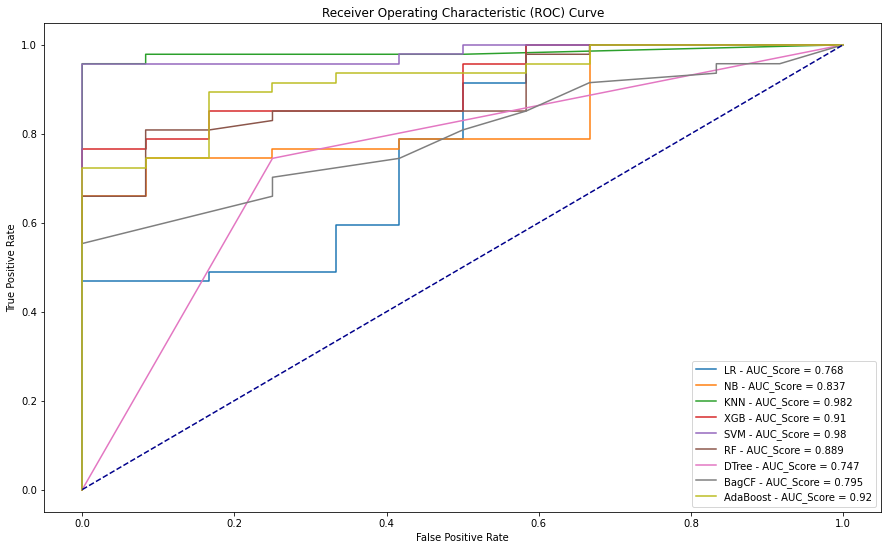

In [60]:
figure=plt.figure(figsize=(15,9))
label_names=['LR - AUC_Score = ','NB - AUC_Score = ','KNN - AUC_Score = ','XGB - AUC_Score = ','SVM - AUC_Score = ',
             'RF - AUC_Score = ','DTree - AUC_Score = ','BagCF - AUC_Score = ','AdaBoost - AUC_Score = ']
for x,q in zip(models,label_names):
    yprob=x.predict_proba(x_test)[:,1]
    AUC_Score=metrics.roc_auc_score(y_test,yprob)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test,yprob)
    
    plt.plot(fpr, tpr, label=q+str(AUC_Score.round(3)))
    
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
    

 <span style="color:purple;font-weight:bold; font-size:2em">Presenting ROC & AUC Score for models with high AUC Score<span>
 
 


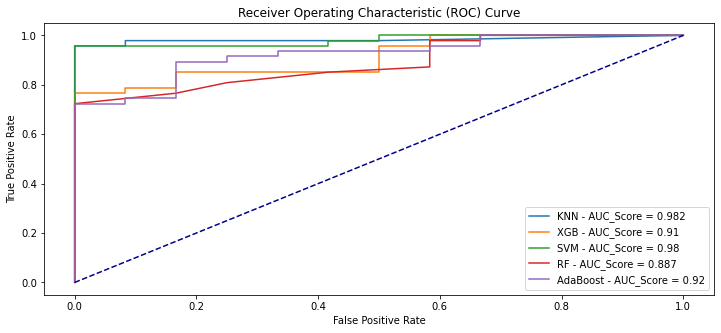

In [61]:
models_highAUC=[KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'),XGBClassifier(),SVC(C=3, gamma=0.25,probability=True),
            RandomForestClassifier(),AdaBoostClassifier(learning_rate=0.8, n_estimators=250)]


figure=plt.figure(figsize=(12,5))
label_names=['KNN - AUC_Score = ','XGB - AUC_Score = ','SVM - AUC_Score = ',
             'RF - AUC_Score = ','AdaBoost - AUC_Score = ']
for x,q in zip(models_highAUC,label_names):
    x.fit(x_train,y_train)
    yprob=x.predict_proba(x_test)[:,1]
    AUC_Score=metrics.roc_auc_score(y_test,yprob)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test,yprob)
    
    plt.plot(fpr, tpr, label=q+str(AUC_Score.round(3)))
    
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
    

 <span style="color:green;font-weight:bold; font-size:2em">7. Train a meta-classifier and note the accuracy on test data (10 points)<span>
 
 


 <span style="color:blue;font-weight:bold; font-size:2em">STACKING<span>
 
 


In [62]:
X=pd_data.drop(['name','status'],axis=1)
y=pd_data['status']

In [63]:
from sklearn.preprocessing import StandardScaler

X_columns=X.columns

scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_columns)

In [64]:
# let's divide our dataset into training set and hold out set by 50%
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 355)

In [65]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2, random_state= 355)

In [66]:
LR_predict_train=LR.predict(x_train)
NB_predict_train=NB.predict(x_train)
KNN_predict_train=KNN.predict(x_train)
xgb_predict_train=xgb.predict(x_train)

train_stack=np.column_stack((LR_predict_train,NB_predict_train,KNN_predict_train,xgb_predict_train))

In [67]:
LR_predict_test=LR.predict(x_test)
NB_predict_test=NB.predict(x_test)
KNN_predict_test=KNN.predict(x_test)
xgb_predict_test=xgb.predict(x_test)

test_stack=np.column_stack((LR_predict_test,NB_predict_test,KNN_predict_test,xgb_predict_test))

In [68]:
LR_predict_val_train=LR.predict(val_train)
NB_predict_val_train=NB.predict(val_train)
KNN_predict_val_train=KNN.predict(val_train)
xgb_predict_val_train=xgb.predict(val_train)

val_train_stack=np.column_stack((LR_predict_val_train,NB_predict_val_train,KNN_predict_val_train,xgb_predict_val_train))

<span style="color:red;font-weight:bold; font-size:2em">Meta - Model 1<span>


In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(train_stack,y_train)
print(knn1.score(train_stack,y_train))                    # 40% of the Data used for fitting.
print(knn1.score(test_stack,y_test))                      # 10% of the Test Data not seen by the model. 
print(knn1.score(val_train_stack,val_test))               # 50% of the Validation Test data not seen by the model.
stacking_predict=knn1.predict(val_train_stack)
train_knn_metamodel1=knn1.score(train_stack,y_train)
test_knn_metamodel1=knn1.score(test_stack,y_test)
val_train_knn_metamodel1=knn1.score(val_train_stack,val_test)

0.922077922077922
0.95
0.9183673469387755


<span style="color:red;font-weight:bold; font-size:2em">Meta - Model 2<span>


In [70]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier()
bgcl.fit(train_stack,y_train)
print(bgcl.score(train_stack,y_train))
print(bgcl.score(test_stack,y_test))
print(bgcl.score(val_train_stack,val_test))
stacking_predict_bgcl=bgcl.predict(val_train_stack)
train_bgcl_metamodel2=bgcl.score(train_stack,y_train)
test_bgcl_metamodel2=bgcl.score(test_stack,y_test)
val_train_bgcl_metamodel2=bgcl.score(val_train_stack,val_test)

0.935064935064935
1.0
0.9183673469387755


<span style="color:red;font-weight:bold; font-size:2em">Meta - Model 3<span>


In [71]:
from xgboost import XGBClassifier
metaxgb=XGBClassifier()
metaxgb.fit(train_stack,y_train)
print(metaxgb.score(train_stack,y_train))
print(metaxgb.score(test_stack,y_test))
print(metaxgb.score(val_train_stack,val_test))
stacking_predict_metaxgb=metaxgb.predict(val_train_stack)
train_xgb_metamodel3=metaxgb.score(train_stack,y_train)
test_xgb_metamodel3=metaxgb.score(test_stack,y_test)
val_train_xgb_metamodel3=metaxgb.score(val_train_stack,val_test)

0.935064935064935
1.0
0.9183673469387755


<span style="color:red;font-weight:bold; font-size:2em">Confusion Matrix of Meta Model 2<span>


In [72]:
confusion_matrix=metrics.confusion_matrix(val_test, stacking_predict_bgcl, labels=[1, 0])
stacking_cm1 = pd.DataFrame(confusion_matrix, index = ["1","0"],
                           columns = ["Stacking_Predict 1","Stacking_Predict 0"])
print(stacking_cm1)

   Stacking_Predict 1  Stacking_Predict 0
1                  69                   5
0                   3                  21


In [73]:
from sklearn.metrics import classification_report

print(classification_report(val_test, stacking_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.96      0.93      0.95        74
           0       0.81      0.88      0.84        24

    accuracy                           0.92        98
   macro avg       0.88      0.90      0.89        98
weighted avg       0.92      0.92      0.92        98



 <span style="color:green;font-weight:bold; font-size:3em">Making Calulations after log transforming the non-normal columns<span>
 
 


 <span style="color:purple;font-weight:bold; font-size:1.5em">The columns which are not normally distributed are as under<span>
 
 


In [74]:
non_normal_columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR']

In [75]:
X=pd_data.drop(['name','status'],axis=1)
y=pd_data['status']

### Let us normally distribute them by taking log of the columns

In [76]:
for p in non_normal_columns:
   X[p]=np.log(X[p]+0.01)

In [77]:
from sklearn.preprocessing import StandardScaler

X_columns=X.columns

scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_columns)
X.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.827744,-0.416344,-1.130115,0.545575,0.753888,0.267060,0.960251,0.372661,0.964767,1.019711,0.811653,1.285832,0.611292,0.850138,0.322084,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.751746,-0.572778,0.113919,0.969128,1.042208,0.646951,1.483176,0.769290,1.660480,1.695464,1.573064,2.085980,1.376809,1.537085,0.182524,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605


In [78]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

 <span style="color:purple;font-weight:bold; font-size:2em">Preparing the models for comparison and noting down the Accuracies & Other Parameters<span>
 
 


In [79]:
# Let us put Confusion Matrix of all the models together for comparison of models.
# Initialising lists with models and model names.
from sklearn import metrics

models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'),XGBClassifier(),SVC(C=3, gamma=0.25,probability=True),
            RandomForestClassifier(),DecisionTreeClassifier(),BaggingClassifier(),AdaBoostClassifier(learning_rate=0.8, n_estimators=250)]
model_names=['LR','NB','KNN','xgb','SVC','RF','DTREE','BAG_CF','AdaBoost']

CM=[]             # Set the confusion matrix to empty list for appending all confusion matrices

Recall=[]        # Setting the parameters to empty list for appending the values for all models.
Specificity=[]
Accuracy=[]
Precision=[]
Neg_Pred_value=[]
F1_Score=[]

TPs=[]
FPs=[]
TNs=[]
FNs=[]
AUC=[]


In [80]:
# Applying FOR-LOOP for calculating confusion matrix & Calculating matrix parameters.

for x,model in zip(model_names, models):
    
    model.fit(x_train,y_train)
    
    y_predict  = model.predict(x_test)
    yprob      =model.predict_proba(x_test)

    
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
    cm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in [x+"_Predict 1",x+"_Predict 0"]])
    CM.append(cm)
           
    TP = cm.iloc[0,0]
    FP= cm.iloc[1,0]
    TN = cm.iloc[1,1]
    FN= cm.iloc[0,1]
    auc_score=metrics.roc_auc_score(y_test, yprob[:,1])
    
    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)
    AUC.append(auc_score)
    
    Recall.append(TP/(TP+FN))
    Specificity.append(TN/(TN+FP))
    Accuracy.append((TP+TN)/(TP+TN+FP+FN))
    Precision.append(TP/(TP+FP))
    Neg_Pred_value.append(TN/(TN+FN))
    

In [81]:
# Calculation F1 Score using list of Precison & Recall.
for i,j in zip(Precision, Recall):
    f1_score=2*((i*j)/(i+j))
    F1_Score.append(f1_score)
    
CM_Main=pd.concat(CM,axis=1)  # Printing the CM of all models.
CM_Main



,LR_Predict 1,LR_Predict 0,NB_Predict 1,NB_Predict 0,KNN_Predict 1,KNN_Predict 0,xgb_Predict 1,xgb_Predict 0,SVC_Predict 1,SVC_Predict 0,RF_Predict 1,RF_Predict 0,DTREE_Predict 1,DTREE_Predict 0,BAG_CF_Predict 1,BAG_CF_Predict 0,AdaBoost_Predict 1,AdaBoost_Predict 0
1,40,7,27,20,43,4,40,7,44,3,40,7,36,11,38,9,42,5
0,6,6,0,12,1,11,6,6,1,11,6,6,1,11,2,10,2,10


In [82]:
# Zipping lists of all the parameters to form the DataFrame for better comparions of all models.
data_tuples = list(zip(TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score))
df2=pd.DataFrame(data_tuples,index=['Logistic Regression','Naive Bayes','KNN','XGBClassifier','SVM MODEL','Random Forest','Decision Tree','Bagging_Classifier','AdaBoost Classifier'],
               columns=['TPs','FNs','TNs','FPs','Recall','Specificity','Accuracy','AUC','Precision','Neg_Pred_value','F1_Score'])
df2

,TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score
Logistic Regression,40,7,6,6,0.851064,0.500000,0.779661,0.758865,0.869565,0.461538,0.860215
Naive Bayes,27,20,12,0,0.574468,1.000000,0.661017,0.835106,1.000000,0.375000,0.729730
KNN,43,4,11,1,0.914894,0.916667,0.915254,0.972518,0.977273,0.733333,0.945055
XGBClassifier,40,7,6,6,0.851064,0.500000,0.779661,0.909574,0.869565,0.461538,0.860215
SVM MODEL,44,3,11,1,0.936170,0.916667,0.932203,0.982270,0.977778,0.785714,0.956522
Random Forest,40,7,6,6,0.851064,0.500000,0.779661,0.880319,0.869565,0.461538,0.860215
Decision Tree,36,11,11,1,0.765957,0.916667,0.796610,0.841312,0.972973,0.500000,0.857143
Bagging_Classifier,38,9,10,2,0.808511,0.833333,0.813559,0.889184,0.950000,0.526316,0.873563
AdaBoost Classifier,42,5,10,2,0.893617,0.833333,0.881356,0.920213,0.954545,0.666667,0.923077


In [83]:
comparison['Accuracy_LogTfm']=df2['Accuracy']

In [84]:
comparison

,Accuracy_w/o_conditn,Accuracy_LogTfm
Logistic Regression,0.779661,0.779661
Naive Bayes,0.644068,0.661017
KNN,0.949153,0.915254
XGBClassifier,0.779661,0.779661
SVM MODEL,0.949153,0.932203
Random Forest,0.779661,0.779661
Decision Tree,0.745763,0.796610
Bagging_Classifier,0.745763,0.813559
AdaBoost Classifier,0.881356,0.881356


 <span style="color:green;font-weight:bold; font-size:2em">Making Calulations after log transforming the non-normal columns and dropping highly correlated (having correlation greater than 0.8) columns<span>
 
 


### Below is the list of columns which are not normally distributed. This list is after dropping highly correlated columns

In [85]:
non_normal_columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'NHR']

In [86]:
X=pd_data.drop(['name','status'],axis=1)
y=pd_data['status']
X=X.drop(column_list,axis=1)

### Let us normally distribute them by taking log of the columns

In [87]:
for p in non_normal_columns:
   X[p]=np.log(X[p]+0.01)

In [88]:
from sklearn.preprocessing import StandardScaler

X_columns=X.columns

scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_columns)
X.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),Shimmer:DDA,NHR,HNR,RPDE,DFA,spread2,D2,PPE
0,-0.827744,-0.416344,-1.130115,0.607532,0.322084,-0.193225,-0.807838,1.760814,0.480477,-0.210531,0.868886
1,-0.751746,-0.572778,0.113919,1.548254,0.182524,-0.634508,-0.387524,1.837562,1.311185,0.275077,1.803605


In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [90]:
# Let us put Confusion Matrix of all the models together for comparison of models.
# Initialising lists with models and model names.
from sklearn import metrics

models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(n_neighbors=3, p=1, weights='distance'),XGBClassifier(),SVC(C=3, gamma=0.25,probability=True),
            RandomForestClassifier(),DecisionTreeClassifier(),BaggingClassifier(),AdaBoostClassifier(learning_rate=0.8, n_estimators=250)]
model_names=['LR','NB','KNN','xgb','SVC','RF','DTREE','BAG_CF','AdaBoost']

CM=[]             # Set the confusion matrix to empty list for appending all confusion matrices

Recall=[]        # Setting the parameters to empty list for appending the values for all models.
Specificity=[]
Accuracy=[]
Precision=[]
Neg_Pred_value=[]
F1_Score=[]

TPs=[]
FPs=[]
TNs=[]
FNs=[]
AUC=[]


In [91]:
# Applying FOR-LOOP for calculating confusion matrix & Calculating matrix parameters.

for x,model in zip(model_names, models):
    
    model.fit(x_train,y_train)
    
    y_predict  = model.predict(x_test)
    yprob      =model.predict_proba(x_test)

    
    confusion_matrix=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
    cm = pd.DataFrame(confusion_matrix, index = [i for i in ["1","0"]],
                  columns = [i for i in [x+"_Predict 1",x+"_Predict 0"]])
    CM.append(cm)
           
    TP = cm.iloc[0,0]
    FP= cm.iloc[1,0]
    TN = cm.iloc[1,1]
    FN= cm.iloc[0,1]
    auc_score=metrics.roc_auc_score(y_test, yprob[:,1])
    
    TPs.append(TP)
    FPs.append(FP)
    TNs.append(TN)
    FNs.append(FN)
    AUC.append(auc_score)
    
    Recall.append(TP/(TP+FN))
    Specificity.append(TN/(TN+FP))
    Accuracy.append((TP+TN)/(TP+TN+FP+FN))
    Precision.append(TP/(TP+FP))
    Neg_Pred_value.append(TN/(TN+FN))
    

In [92]:
# Calculation F1 Score using list of Precison & Recall.
for i,j in zip(Precision, Recall):
    f1_score=2*((i*j)/(i+j))
    F1_Score.append(f1_score)
    
CM_Main=pd.concat(CM,axis=1)  # Printing the CM of all models.
CM_Main



,LR_Predict 1,LR_Predict 0,NB_Predict 1,NB_Predict 0,KNN_Predict 1,KNN_Predict 0,xgb_Predict 1,xgb_Predict 0,SVC_Predict 1,SVC_Predict 0,RF_Predict 1,RF_Predict 0,DTREE_Predict 1,DTREE_Predict 0,BAG_CF_Predict 1,BAG_CF_Predict 0,AdaBoost_Predict 1,AdaBoost_Predict 0
1,41,6,34,13,41,6,42,5,42,5,44,3,40,7,43,4,42,5
0,7,5,2,10,0,12,3,9,1,11,5,7,5,7,2,10,4,8


In [93]:
# Zipping lists of all the parameters to form the DataFrame for better comparions of all models.
data_tuples = list(zip(TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score))
df3=pd.DataFrame(data_tuples,index=['Logistic Regression','Naive Bayes','KNN','XGBClassifier','SVM MODEL','Random Forest','Decision Tree','Bagging_Classifier','AdaBoost Classifier'],
               columns=['TPs','FNs','TNs','FPs','Recall','Specificity','Accuracy','AUC','Precision','Neg_Pred_value','F1_Score'])
df3

,TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score
Logistic Regression,41,6,5,7,0.872340,0.416667,0.779661,0.767730,0.854167,0.454545,0.863158
Naive Bayes,34,13,10,2,0.723404,0.833333,0.745763,0.829787,0.944444,0.434783,0.819277
KNN,41,6,12,0,0.872340,1.000000,0.898305,0.994681,1.000000,0.666667,0.931818
XGBClassifier,42,5,9,3,0.893617,0.750000,0.864407,0.884752,0.933333,0.642857,0.913043
SVM MODEL,42,5,11,1,0.893617,0.916667,0.898305,0.962766,0.976744,0.687500,0.933333
Random Forest,44,3,7,5,0.936170,0.583333,0.864407,0.910461,0.897959,0.700000,0.916667
Decision Tree,40,7,7,5,0.851064,0.583333,0.796610,0.717199,0.888889,0.500000,0.869565
Bagging_Classifier,43,4,10,2,0.914894,0.833333,0.898305,0.898936,0.955556,0.714286,0.934783
AdaBoost Classifier,42,5,8,4,0.893617,0.666667,0.847458,0.934397,0.913043,0.615385,0.903226


In [94]:
comparison['Acc_with_log_&_drop_corr']=df3['Accuracy']
comparison

,Accuracy_w/o_conditn,Accuracy_LogTfm,Acc_with_log_&_drop_corr
Logistic Regression,0.779661,0.779661,0.779661
Naive Bayes,0.644068,0.661017,0.745763
KNN,0.949153,0.915254,0.898305
XGBClassifier,0.779661,0.779661,0.864407
SVM MODEL,0.949153,0.932203,0.898305
Random Forest,0.779661,0.779661,0.864407
Decision Tree,0.745763,0.796610,0.796610
Bagging_Classifier,0.745763,0.813559,0.898305
AdaBoost Classifier,0.881356,0.881356,0.847458


 <span style="color:green;font-weight:bold; font-size:2em">9. Compare all the models (minimum 5) and pick the best one among them (10 points)<span>
 
 


### Let us first decided which approach to use:-
#### 1. The approach of log transforming the features and dropping the correlated columns
#### 2. The approach of not doing any of the above thing and directly implementing the models.

In [95]:
comparison

,Accuracy_w/o_conditn,Accuracy_LogTfm,Acc_with_log_&_drop_corr
Logistic Regression,0.779661,0.779661,0.779661
Naive Bayes,0.644068,0.661017,0.745763
KNN,0.949153,0.915254,0.898305
XGBClassifier,0.779661,0.779661,0.864407
SVM MODEL,0.949153,0.932203,0.898305
Random Forest,0.779661,0.779661,0.864407
Decision Tree,0.745763,0.796610,0.796610
Bagging_Classifier,0.745763,0.813559,0.898305
AdaBoost Classifier,0.881356,0.881356,0.847458


In the above table the columns are as under:-
  1. Accuracy_w/o_conditn :- This columns has been derived after neither log transforming the columns or dropping the 
     correlated columns. This means if we want the know what is the accuracy of the model without any feature  
     engineering, this is that column.
  2. Accuracy_LogTfm :- Only log transformation has been applied in feature engineering. 
  3. Acc_with_log_&_drop_corr :- Both log transformation and dropping higly correlated columns have been done in 
     feature engineering. All the accuracies are after doing feature engineering.

In all the three columns if we see, KNN & SVM are the models which have given highest accuracies.
OF all the three columns, the first column (Without any feature engineering) have given highest accuracy.
Also, the False Negative values is lowest for the approach where we have not applied any Feature Engineering

Hence, we can conclude that not doing feature engineering would be a better decision.

Hence, while implementing and evaluating models, we will not apply any kind of feature engineering and model comparison will be also of non feature engineereed columns.

 <span style="color:purple;font-weight:bold; font-size:2em">Let us now compare models<span>
 
 


 <span style="color:blue;font-weight:bold; font-size:1em">Before we begin to compare our models, let us understand what answers are we acutally searching for, from applying Machine learning models.<span>
    
   <span style="color:blue;font-weight:bold; font-size:1em">We have to classify the patients into 2 classification status, Disease or No Disease based on the voice data given.<span>
     
 <span style="color:blue;font-weight:bold; font-size:1em">Let us check what tools we have to our disposal to check whether our models are doing thier jobs correctly and what is the trade off we would have to do.<span>
     

 <span style="color:blue;font-weight:bold; font-size:1em">     1. Model Accuracies<span>

 <span style="color:blue;font-weight:bold; font-size:1em">     2. Confusion Matrix<span>

 <span style="color:blue;font-weight:bold; font-size:1em">     3. Classification Report<span>

<span style="color:blue;font-weight:bold; font-size:1em"> In confusion matrix there are four values, FP,FN,TP,TN.  TP,TN are fine because these are the values correctly predicted by the model. Problem is with FP,FN values. <span>

<span style="color:blue;font-weight:bold; font-size:1em"> We need to minimize the FN and FP values. But out of these two if given choice our focus will be to select model which minimizes FN values.<span>
    
 <span style="color:blue;font-weight:bold; font-size:1em">FN is the nothing but model predicting that a person does not have disease and in reality the person has disease.<span>
     
<span style="color:blue;font-weight:bold; font-size:1em">     FP is nothing but a model predicting that a person has disease and in reality the person does not have disease.<span>
    
 <span style="color:blue;font-weight:bold; font-size:1em">The cost of falsely predicting that a person does not have disease is high. Because False prediction of NO DISEASE may cost a person his life.<span>




Let us first see which models we have applied :-

  1. Standard Classification Models:- LR,KNN,SVM,NB
  2. Ensemble Models:- XGBClassifier, Random Forest,Decision Tree, Bagging Classifier, AdaBoost Classifier
  3. Meta Modles:- We have used KNN & Bagging Classifiers as Meta Models
  
 We will be checking the accuracies and Confusion Matrix relevant values across these models.

<span style="color:red;font-weight:bold; font-size:2em">Standard Classification Models & Ensemble Models<span>


In [96]:
df1

,TPs,FNs,TNs,FPs,Recall,Specificity,Accuracy,AUC,Precision,Neg_Pred_value,F1_Score
Logistic Regression,40,7,6,6,0.851064,0.500000,0.779661,0.767730,0.869565,0.461538,0.860215
Naive Bayes,26,21,12,0,0.553191,1.000000,0.644068,0.836879,1.000000,0.363636,0.712329
KNN,44,3,12,0,0.936170,1.000000,0.949153,0.982270,1.000000,0.800000,0.967033
XGBClassifier,40,7,6,6,0.851064,0.500000,0.779661,0.909574,0.869565,0.461538,0.860215
SVM MODEL,44,3,12,0,0.936170,1.000000,0.949153,0.980496,1.000000,0.800000,0.967033
Random Forest,41,6,5,7,0.872340,0.416667,0.779661,0.889184,0.854167,0.454545,0.863158
Decision Tree,35,12,9,3,0.744681,0.750000,0.745763,0.747340,0.921053,0.428571,0.823529
Bagging_Classifier,38,9,6,6,0.808511,0.500000,0.745763,0.795213,0.863636,0.400000,0.835165
AdaBoost Classifier,42,5,10,2,0.893617,0.833333,0.881356,0.920213,0.954545,0.666667,0.923077


<span style="color:red;font-weight:bold; font-size:2em">Meta Models<span>


In [97]:
train_list=[train_knn_metamodel1,train_bgcl_metamodel2,train_xgb_metamodel3,'40% data']
test_list=[test_knn_metamodel1,test_bgcl_metamodel2,test_xgb_metamodel3,'10% data']
val_train=[val_train_knn_metamodel1,val_train_bgcl_metamodel2,val_train_xgb_metamodel3,'50% data']

acc_list=list(zip(train_list,test_list,val_train))

metamodel=pd.DataFrame(acc_list,columns=['Train_Acc','Test_Acc','Val_Train_Acc'],
                                index=['KNN','Bagging Classifier','XGB Classifier','%age of Data'])
metamodel

,Train_Acc,Test_Acc,Val_Train_Acc
KNN,0.922078,0.95,0.918367
Bagging Classifier,0.935065,1,0.918367
XGB Classifier,0.935065,1,0.918367
%age of Data,40% data,10% data,50% data


In [98]:
print(f"The confusion Matrix for Meta Model is \n {stacking_cm1}")

The confusion Matrix for Meta Model is 
    Stacking_Predict 1  Stacking_Predict 0
1                  69                   5
0                   3                  21


<span style="color:red;font-weight:bold; font-size:2em">Final Concolusion:-<span>


<span style="color:green;font-weight:bold; font-size:2em">Best Model => Metal Model - BGCL/XGB <span>


<span style="color:green;font-weight:bold; font-size:1.5em">Rationale for best model:-<span>


FN,FP values of  KNN & SVM in **Standard Classification Models** is 3,0 respectively and both the models have accuracy of 94.9%.

Whereas,

FN,FP values of  BGCL & XGB in **Metal Models** is 5,3 respectively and both the models have accuracy of 91.8%.

One would wonder that why have we still selected metal models as best model.

The reason is as under:-

In **Standard Classification & Ensemble Models** we have used **GridSearch** algorithm to find the best values of hyperparameters. But it is interesting to note that **Cross Validation** is a part of **GridSearch Algorithm** and hence the **Input we use for GridSearch is X,y**. 

That means we are passing the entire data **X** for finding the best values for hyperparameters.
So, there is a problem of **Data Leakage**. The GridSearch algorithm has **already seen x_test** data on which we find our final accuracies for Standard Classification Models.

**Hence, the high accuracy which we get in Standard Classification Models is due to data leakge problem. GridSearch has already seen the x_test data to find the best value for Hyperparameter tuning and because of which we are getting high accuracy.**

**On the other hand, in Meta Model we have not done any hyper parameter tuning using GridSearch. We have used train data of 40% of the Data to fit the model and then for rest of the 60% of the data we are using just to calculate the accuracy.**

**val_data is 50% and the accuracy on this unseen 50% data is 91.8% which is good.**

**FN values of Standard Classification is '3' & Meta Model is '5'. Hence, Metal Model has 2 more values of FN. But this model will perform better on unseen data and real world prediction would be higher.**

**Hence, we have selected Metal Models as best Model**
